This data has been provided by a company which provides a direct-to-consumer service. 


Categorical features:
1. Ord_type_code
2. Service
3. first_purchase
4. number_of_purchases <-- define as interval (1, 2-4, >4)
5. ord_channel_type_code
6. ord_payment_status_code
7. coupon_code


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import datetime as dt
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
# Read csv data file and display first 5 records
df = pd.read_csv('data/kpi_purchase_202111152150.csv', sep=';')
df.head(5)

,partner_id,customer_id,ord_type_code,service,order_id,ddate,first_purchase,number_of_purchases,ord_channel_type_code,ord_payment_status_code,coupon_code,sales,excess_subscription,pymt_order,pymt_order_upselling,pymt_subscription,pymt_subscription_excess,refund_order,refund_subscription,refund_subscription_excess
0,74398,74698153,B2C,orders,74128047.0,2020-03-18,True,1,OFFLINE,PAID,NaN,135.0,0.0,135.0,0,0.0,0.0,0.0,0.0,0.0
1,74457,74698133,B2C,orders,74000506.0,2019-07-16,True,1,OFFLINE,PAID,NaN,75.0,0.0,75.0,0,0.0,0.0,0.0,0.0,0.0
2,74457,74698133,B2C,orders,73988814.0,2019-09-25,False,2,OFFLINE,PAID,NaN,75.0,0.0,75.0,0,0.0,0.0,0.0,0.0,0.0
3,74457,74698133,B2C,orders,73992133.0,2019-10-28,False,3,OFFLINE,PAID,NaN,100.0,0.0,100.0,0,0.0,0.0,0.0,0.0,0.0
4,74457,74698133,B2C,orders,74013759.0,2019-11-07,False,4,OFFLINE,PAID,NaN,120.0,0.0,120.0,0,0.0,0.0,0.0,0.0,0.0


In [3]:
# Display column names
df.columns

Index(['partner_id', 'customer_id', 'ord_type_code', 'service', 'order_id',
       'ddate', 'first_purchase', 'number_of_purchases',
       'ord_channel_type_code', 'ord_payment_status_code', 'coupon_code',
       'sales', 'excess_subscription', 'pymt_order', 'pymt_order_upselling',
       'pymt_subscription', 'pymt_subscription_excess', 'refund_order',
       'refund_subscription', 'refund_subscription_excess'],
      dtype='object')

In [4]:
# Display info about df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162271 entries, 0 to 162270
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   partner_id                  162271 non-null  int64  
 1   customer_id                 162271 non-null  int64  
 2   ord_type_code               162271 non-null  object 
 3   service                     162271 non-null  object 
 4   order_id                    149357 non-null  float64
 5   ddate                       162271 non-null  object 
 6   first_purchase              162271 non-null  bool   
 7   number_of_purchases         162271 non-null  int64  
 8   ord_channel_type_code       162271 non-null  object 
 9   ord_payment_status_code     162271 non-null  object 
 10  coupon_code                 9188 non-null    object 
 11  sales                       162271 non-null  float64
 12  excess_subscription         162271 non-null  float64
 13  pymt_order    

There are null values in two feature columns, order_id and coupon_code.

In [5]:
# sum NaN by feature
df.isna().sum()

partner_id                         0
customer_id                        0
ord_type_code                      0
service                            0
order_id                       12914
ddate                              0
first_purchase                     0
number_of_purchases                0
ord_channel_type_code              0
ord_payment_status_code            0
coupon_code                   153083
sales                              0
excess_subscription                0
pymt_order                         0
pymt_order_upselling               0
pymt_subscription                  0
pymt_subscription_excess           0
refund_order                       0
refund_subscription                0
refund_subscription_excess         0
dtype: int64

As we saw with the info() method, there are NaNs in 'coupon_code' and 'order_id' feature columns. Order_id useless data for the purposes of machine learning (useless data is unique, discrete data with no potential relationship with the outcome variable. -- https://towardsdatascience.com/7-data-types-a-better-way-to-think-about-data-types-for-machine-learning-939fae99a689). 

In [6]:
# Fill NaN order_ids with 0
df['order_id'].fillna(0, inplace=True)

In [7]:
# Set dtype of order_id to int
df.order_id = df.order_id.astype(int)

Let's look at the coupon_code feature. There seem to be a lot of different codes. The NaNs represent that no coupon was used.

As a person who uses coupons to try new services when I'm not certain of the value, I suspect that people who use coupons are more likely to churn than those who do not use coupons. 


In [8]:
# How many unique coupon_code values and how often are they used?
df.groupby(['coupon_code']).size().sort_values(ascending=False)

coupon_code
ACGFREEDELIVERY    1364
OIBRASIL            467
MJSB-CD_EDREDOM     355
FRETEGRATIS         327
LOGISTICAMOEMA      299
                   ... 
ITALOM03              1
ITALOA11              1
ISISZ03               1
ISADORAD05            1
YURIM26               1
Length: 773, dtype: int64

In [9]:
# Create dictionary in order to find how many codes are used only once or twice
coup_dict = df.groupby('coupon_code').size().to_dict()

In [10]:
# Counter is imported at top. Count dict values
coup_counter = Counter(coup_dict.values())

In [11]:
# display coup_counter
print(coup_counter)

Counter({1: 402, 2: 139, 3: 43, 4: 29, 6: 16, 5: 10, 7: 9, 8: 8, 12: 7, 10: 6, 23: 5, 9: 5, 14: 4, 29: 4, 16: 4, 21: 3, 58: 3, 25: 3, 18: 3, 50: 3, 34: 3, 11: 3, 49: 2, 13: 2, 42: 2, 35: 2, 20: 2, 22: 2, 19: 2, 122: 2, 60: 2, 56: 2, 15: 2, 70: 2, 28: 1, 61: 1, 72: 1, 1364: 1, 236: 1, 27: 1, 33: 1, 38: 1, 238: 1, 94: 1, 59: 1, 327: 1, 31: 1, 86: 1, 81: 1, 82: 1, 48: 1, 129: 1, 67: 1, 272: 1, 299: 1, 73: 1, 239: 1, 355: 1, 68: 1, 17: 1, 95: 1, 52: 1, 467: 1, 39: 1, 109: 1, 87: 1, 24: 1, 104: 1, 218: 1, 37: 1, 97: 1})


There are 773 unique coupon_codes. Some are used many times, but 641 codes were used only 1 or 2 times. The actual coupon code should not be used as it would introduce far too many features of questionable import. The importance is only the presence of a coupon code, or not. Let's create a new feature which only indicates whether a coupon was used or not. 
We do not need to use one-hot encoding in this case since we do not have any information about the discounts for each code. Instead we only need a yes/no, 1 for a coupon, 0 for no coupon. 
Then, we can drop the coupon_code columns. 

In [12]:
# create column 'coupon_code_cat' where a null value in 'coupon_code'
# indicates a 0, else a 1
df['couponUsed'] = df[['coupon_code']].notnull().astype(int)

In [13]:
df.drop(['coupon_code'], axis=1, inplace=True)
df.tail()

,partner_id,customer_id,ord_type_code,service,order_id,ddate,first_purchase,number_of_purchases,ord_channel_type_code,ord_payment_status_code,sales,excess_subscription,pymt_order,pymt_order_upselling,pymt_subscription,pymt_subscription_excess,refund_order,refund_subscription,refund_subscription_excess,couponUsed
162266,74372,292327026,PLAN_S_BR,subscription,0,2021-06-01,False,8,OFFLINE,UNPAID,208.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1
162267,74372,292327026,PLAN_S_BR,subscription,0,2021-06-21,False,9,OFFLINE,PAID,187.2,0.0,0.0,0,208.0,0.0,0.0,-20.8,0.0,1
162268,74372,292327026,PLAN_S_BR,subscription,0,2021-07-28,False,10,OFFLINE,PAID,208.0,0.0,0.0,0,208.0,0.0,0.0,0.0,0.0,1
162269,74372,292327026,PLAN_S_BR,subscription,0,2021-08-13,False,11,OFFLINE,PAID,208.0,0.0,0.0,0,208.0,0.0,0.0,0.0,0.0,1
162270,74372,292327026,PLAN_S_BR,subscription,0,2021-09-20,False,12,OFFLINE,PAID,208.0,0.0,0.0,0,208.0,0.0,0.0,0.0,0.0,1


Let's go forward, looking at each column individually. 
First we have an index column.
Next is a partner_id. How many unique values are in partner_id, and what is the datatype?

In [14]:
# Count num of unique partner IDs
df.partner_id.nunique(), df.partner_id.dtypes

(82, dtype('int64'))

There are 82 unique partner_ids, which represent locations. The datatype is integer, which is appropriate. What is the distribution of orders by partner_id?

In [15]:
partnerDist = df.groupby('partner_id').size().sort_values()
print(partnerDist.min(),",", partnerDist.max())

19 , 8383


<AxesSubplot:xlabel='partner_id'>

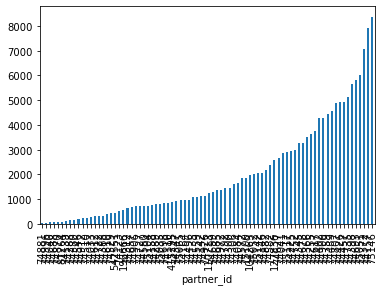

In [16]:
# plot hist of partner_id by number of orders
partnerDist.plot(kind='bar')

This plot is a bit silly, but it shows that the locations have between 19 and 8000+ transactions. We don't information about where they're located or how long they've been open. We don't want to one-hot encode 82 partner locations, and we can't group them by anything based on the information that we have. As it stands, we will not use this feature for machine learning.  

Next, we have customer_id. Check the datatype:

In [17]:
df.dtypes['customer_id']

dtype('int64')

The next two columns are 'ord_type_code' and 'service'. First, check the contents, looking at the type of data, possible values, and distribution.

In [18]:
# Look at values of ord_type_code. 
df.ord_type_code.unique(), df.ord_type_code.nunique()

(array(['B2C', 'SUBSCRIPTION', 'PLAN_XS_BR', 'PLAN_LAVA_PLANCHA_BR',
        'PLAN_PLANCHA_BR', 'PLAN_S_BR', 'PLAN_M_BR', 'PLAN_L_BR',
        'PLAN_XL_BR'], dtype=object),
 9)

There are 9 unique order types. How are order types divided across service types? Do they represent separate characteristics that should both be included in the data?

In [19]:
# Print out sizes of order_type_code cohorts
print(df.groupby(['ord_type_code']).size())

ord_type_code
B2C                     109006
PLAN_LAVA_PLANCHA_BR      1687
PLAN_L_BR                   87
PLAN_M_BR                 1115
PLAN_PLANCHA_BR            724
PLAN_S_BR                 5898
PLAN_XL_BR                  14
PLAN_XS_BR                3389
SUBSCRIPTION             40351
dtype: int64


In [20]:
# Price out sizes of service type cohorts.
serv_ord = df.groupby(['service', 'ord_type_code']).size().unstack().fillna(0)
print(serv_ord)

ord_type_code       B2C  PLAN_LAVA_PLANCHA_BR  PLAN_L_BR  PLAN_M_BR  \
service                                                               
orders         109006.0                   0.0        0.0        0.0   
subscription        0.0                1687.0       87.0     1115.0   

ord_type_code  PLAN_PLANCHA_BR  PLAN_S_BR  PLAN_XL_BR  PLAN_XS_BR  \
service                                                             
orders                     0.0        0.0         0.0         0.0   
subscription             724.0     5898.0        14.0      3389.0   

ord_type_code  SUBSCRIPTION  
service                      
orders              40351.0  
subscription            0.0  


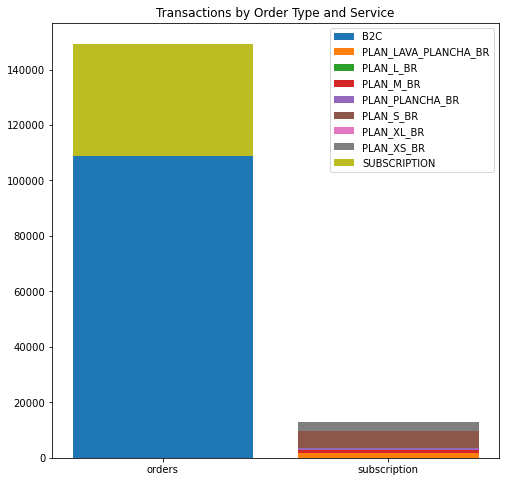

In [21]:
# Plot transactions by order type and service

fig, ax = plt.subplots(figsize=(8,8))

# Initialize the bottom at zero for the first set of bars.
bottom = np.zeros(len(serv_ord))

# Plot each layer of the bar, adding each bar to the "bottom" so
# the next bar starts higher.
for i, col in enumerate(serv_ord.columns):
  ax.bar(serv_ord.index, serv_ord[col], bottom=bottom, label=col)
  bottom += np.array(serv_ord[col])

ax.set_title('Transactions by Order Type and Service')
ax.legend()


Because there are two possible values within the 'service' feature, and no null entries, it is easy to create a new categorical column to capture this data. 

Use sklearn's OneHotEncoder instead of panda's get_dummies method, becuase OneHotEncoder will save the exploded categories into it's object, and it will work better if sometimes there are more than two categories.

'Subscription' - when someone has a subscription and requests a service covered by that subscription
'Order' - purchase without any subscription, or a purchase of excess services not included by a customer's subscription

In [22]:
# Instantiate OneHotEncoder for 'service' feature
enc_serv = OneHotEncoder(drop='first')

#perform one-hot encoding on 'service' column 
enc_serv_df = pd.DataFrame(enc_serv.fit_transform(df[['service']]).toarray())

In [23]:
# join encoded column(s) to original df
df = df.join(enc_serv_df)

In [24]:
# rename onehotencoder'ed column
df.rename(columns = {0:'service_cat'}, inplace=True)

In [25]:
# Check encoder categories
enc_serv.categories_

[array(['orders', 'subscription'], dtype=object)]

After that, we have 'ddate'. This may be compelling data. First, make sure the column is of a type, 'datetime'. Then let's create a new feature indicating 'weekday' vs 'weekend'. 

In [26]:
# What type of data is the ddate column?
df.dtypes['ddate']

dtype('O')

In [27]:
# Specify format and convert to datetime
timefmt = "%Y-%m-%d" 
df['ddate'] = pd.to_datetime(df['ddate'], format = timefmt, errors='coerce')
df.rename(columns={'ddate':'order_date'}, inplace=True)
df.dtypes['order_date']

dtype('<M8[ns]')

In [28]:
# Look at odd datetime object type
np.dtype('datetime64[ns]') == np.dtype('<M8[ns]')

True

In [29]:
# Sort by date of order
df.sort_values(['order_date', 'partner_id'], inplace=True)
df.tail()

,partner_id,customer_id,ord_type_code,service,order_id,order_date,first_purchase,number_of_purchases,ord_channel_type_code,ord_payment_status_code,...,excess_subscription,pymt_order,pymt_order_upselling,pymt_subscription,pymt_subscription_excess,refund_order,refund_subscription,refund_subscription_excess,couponUsed,service_cat
121649,104269,391927226,B2C,orders,729228944,2021-11-13,False,2,OFFLINE,UNPAID,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0
92850,127836,75279459,B2C,orders,729392304,2021-11-13,False,32,OFFLINE,UNPAID,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1,0.0
101172,415295,1155535826,B2C,orders,729345989,2021-11-13,True,1,OFFLINE,PAID,...,0.0,30.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0
129127,415295,1155316343,B2C,orders,728706530,2021-11-13,True,1,OFFLINE,UNPAID,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0
151293,75146,74835321,PLAN_PLANCHA_BR,subscription,0,2021-11-14,False,12,ONLINE,UNPAID,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,1.0


Using the date column, let's create a new column that says whether the day is a weekday or a weekend. 

In [30]:
# Create column composing of day index for the day of week (0 - 6)
df['dayIndex'] = df['order_date'].dt.day_of_week
# Create dictionary of values representing weekend / not weekend for each day of the week
day_dict = {
    0:1, 1:1, 2:1, 3:1, 4:1, 5:0, 6:0
            }
df['isWeekday'] = df['dayIndex'].map(day_dict).fillna('Other')
df.head()

,partner_id,customer_id,ord_type_code,service,order_id,order_date,first_purchase,number_of_purchases,ord_channel_type_code,ord_payment_status_code,...,pymt_order_upselling,pymt_subscription,pymt_subscription_excess,refund_order,refund_subscription,refund_subscription_excess,couponUsed,service_cat,dayIndex,isWeekday
59625,74617,75068583,B2C,orders,73561191,2019-02-13,True,1,OFFLINE,PAID,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,2,1
83232,74617,75217439,B2C,orders,73867112,2019-02-13,True,1,ONLINE,PAID,...,0,0.0,0.0,0.0,0.0,0.0,1,0.0,2,1
134457,74617,75538555,B2C,orders,74067023,2019-02-13,True,1,ONLINE,PAID,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,2,1
144248,74617,75600608,B2C,orders,74071974,2019-02-13,True,1,ONLINE,PAID,...,0,0.0,0.0,0.0,0.0,0.0,1,0.0,2,1
51598,74617,75016070,B2C,orders,74007901,2019-02-15,True,1,ONLINE,PAID,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,4,1


The following column is 'first_purchase' represented by a True or False. Are these booleans?

In [31]:
print(df.first_purchase.dtypes)

bool


Nothing needs to be done with this column, booleans are perfect

How about the following column, 'number_of_purchases'?

In [32]:
print(df.number_of_purchases.dtypes)

int64


The ord_channel_type_code column holds information about how the order was placed. This can be onehotencoded using the same procedure as we did with the service category. 

In [33]:
df.ord_channel_type_code.unique()

array(['OFFLINE', 'ONLINE'], dtype=object)

In [34]:
df.head()

,partner_id,customer_id,ord_type_code,service,order_id,order_date,first_purchase,number_of_purchases,ord_channel_type_code,ord_payment_status_code,...,pymt_order_upselling,pymt_subscription,pymt_subscription_excess,refund_order,refund_subscription,refund_subscription_excess,couponUsed,service_cat,dayIndex,isWeekday
59625,74617,75068583,B2C,orders,73561191,2019-02-13,True,1,OFFLINE,PAID,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,2,1
83232,74617,75217439,B2C,orders,73867112,2019-02-13,True,1,ONLINE,PAID,...,0,0.0,0.0,0.0,0.0,0.0,1,0.0,2,1
134457,74617,75538555,B2C,orders,74067023,2019-02-13,True,1,ONLINE,PAID,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,2,1
144248,74617,75600608,B2C,orders,74071974,2019-02-13,True,1,ONLINE,PAID,...,0,0.0,0.0,0.0,0.0,0.0,1,0.0,2,1
51598,74617,75016070,B2C,orders,74007901,2019-02-15,True,1,ONLINE,PAID,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,4,1


In [35]:
df.columns

Index(['partner_id', 'customer_id', 'ord_type_code', 'service', 'order_id',
       'order_date', 'first_purchase', 'number_of_purchases',
       'ord_channel_type_code', 'ord_payment_status_code', 'sales',
       'excess_subscription', 'pymt_order', 'pymt_order_upselling',
       'pymt_subscription', 'pymt_subscription_excess', 'refund_order',
       'refund_subscription', 'refund_subscription_excess', 'couponUsed',
       'service_cat', 'dayIndex', 'isWeekday'],
      dtype='object')

The next column is 'ord_payment_status_code. Let's look at the unique values and how manhy records of each are included. 

In [36]:
# groupby payment status and count occurences of each
df.groupby(['ord_payment_status_code']).size()

ord_payment_status_code
PAID              151411
UNPAID             10691
UNPAID_PARTIAL       169
dtype: int64

In [37]:
# is the number of unpaid orders the same as the subscription orders? 
df['service'].value_counts()['subscription']

12914

There are 3 values and they don't obviously seem to be directly related to service type. Let's encode these are categories. 

We already handled the coupon code, so let's look at 'sales', perhaps our first continuous column. 

In [38]:
# Describe the data
print(df.sales.describe())

count    162271.00000
mean         65.42702
std          87.69646
min        -139.00000
25%           0.00000
50%          40.00000
75%          86.00000
max        5089.40000
Name: sales, dtype: float64


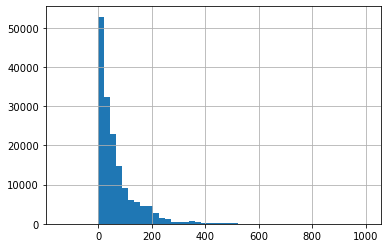

0.9995316476758016


(None, None)

In [39]:
# display a quick histogram of the data with sales below $1000, which is most of the data
df[df.sales<1000].sales.hist(bins=50)
plt.show(), print(df[df.sales<1000].size/df.size)

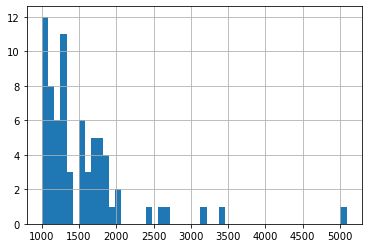

0.00044370220187217677


(None, None)

In [40]:
# Display data of sales that are over $1000
df[df.sales>1000].sales.hist(bins=50)
plt.show(), print(df[df.sales>1000].size/df.size)

We see that 99.95% of the data is of records consisting of sales less than 1000. 
At this point I am going to leave this data as continuous, but perhaps drop all data consisting of sales over 1000. Let's investigate the other continuous columns:

In [41]:
# Describe excess_subscription columns
print(df.excess_subscription.describe())

count    162271.000000
mean          0.591027
std          11.211613
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        1840.000000
Name: excess_subscription, dtype: float64


In [42]:
# How many of these records are non-zero
print(len(df[df.excess_subscription != 0]),"  ", df[df.excess_subscription != 0].excess_subscription.mean())

1234    77.72001620745543


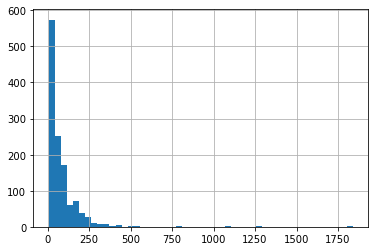

In [43]:
# Display quick hist of data
df[df.excess_subscription>0].excess_subscription.hist(bins=50)
plt.show()

The excess_subscription column contains mostly 0's. There are 1234 non-zero values in the column. The mean of the non-zero values is approximately 77.72.

In [44]:
# Display pymt_order 
print(df.pymt_order.describe())

count    162271.000000
mean         45.609909
std          74.198247
min           0.000000
25%           0.000000
50%          28.000000
75%          62.000000
max        5089.400000
Name: pymt_order, dtype: float64


It looks like there are values that are 0, and perhaps outliers at 5000+. Let's count the number of 0 values and try to figure out why there are 0 values, and ascertain whether that 5089 is just an outlier or an error. 

In [45]:
# print number of records with pymt_order = 0
print(len(df[df.pymt_order == 0]))

63091


In [46]:
# print number of records with pymt_order > 1000
print(len(df[df.pymt_order > 5000]),",", len(df[df.pymt_order > 1000]))

1 , 62


There is only one record about 5000, and only 62 records with values over 1000. These records may be aggregated sales - maybe old sales aggregated and added to a new system? What is the date on the values over 1000?

In [47]:
# delete record with pymt over 5000
df = df[df.pymt_order < 5000]

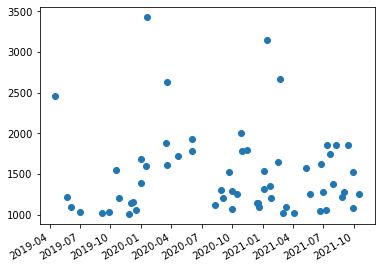

In [48]:
# Display quick scatter of data from sales over 1000
po_plot = df[df.pymt_order>1000]
plt.scatter(data=po_plot, x='order_date', y='pymt_order')
plt.xticks(rotation=30, ha='right')
plt.show()

It doesn't look like these large values for pymt_order are old, or at any specific point in time at all. Let's look at a quick histogram of pymt_order that is non-zero and less than 400. 

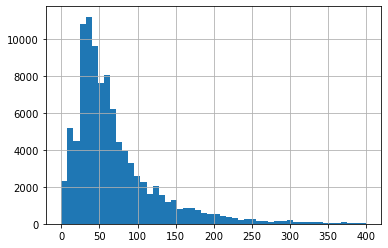

In [49]:
# Display quick hist of data of pymt_order greater than 0 and less than 400
df[(df.pymt_order<400) & (df.pymt_order>0)].pymt_order.hist(bins=50)
plt.show()

Let's look at the column, order_upselling.

In [50]:
print(df.pymt_order_upselling.describe())

count    162270.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: pymt_order_upselling, dtype: float64


This column is all zeros so it should be dropped. It has no relationship with the outcome. 

The next three columns have to do with refunds. One represents refunds on the service category 'order' and the other, refunds on the service category 'subscription'. The final column is refund_subscription_excess, which has happened only 18 times. 

In [51]:
df.drop(columns=['pymt_order_upselling'], axis=1, inplace=True)

In [52]:
# describe data in refund_order
print(df.refund_order.describe())

count    162270.000000
mean         -0.356910
std           9.047509
min       -1080.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           0.000000
Name: refund_order, dtype: float64


In [53]:
print(len(df[df.refund_order<0]))

709


In [54]:
# describe data in refund_subscription
print(df.refund_subscription.describe())

count    162270.000000
mean         -0.665659
std          11.892790
min        -529.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           0.000000
Name: refund_subscription, dtype: float64


In [55]:
print(len(df[df.refund_subscription<0]))

647


In [56]:
print(df.refund_subscription_excess.describe())

count    162270.000000
mean         -0.030671
std           4.533106
min       -1450.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           0.000000
Name: refund_subscription_excess, dtype: float64


In [57]:
print(len(df[df.refund_subscription_excess<0]))

18


In [58]:
df.columns

Index(['partner_id', 'customer_id', 'ord_type_code', 'service', 'order_id',
       'order_date', 'first_purchase', 'number_of_purchases',
       'ord_channel_type_code', 'ord_payment_status_code', 'sales',
       'excess_subscription', 'pymt_order', 'pymt_subscription',
       'pymt_subscription_excess', 'refund_order', 'refund_subscription',
       'refund_subscription_excess', 'couponUsed', 'service_cat', 'dayIndex',
       'isWeekday'],
      dtype='object')

Let's make a new feature, using feature crossing and call this feature serviceChannel. 
One interesting question is, how many customers fell into the following categories?
  1. Online and Order
  2. Online and Subscription
  3. Offline and Order
  4. Offline and Subscription

Let's create a new feature with categorical 1-4 values, then onehotencode to prepare it for machine learning. 

In [59]:
# review the contents of the appropriate columns
df.service.unique(), df.ord_channel_type_code.unique()

(array(['orders', 'subscription'], dtype=object),
 array(['OFFLINE', 'ONLINE'], dtype=object))

In [60]:
# write the logic
df.loc[(df['ord_channel_type_code'] == 'ONLINE') & (df['service'] == 'orders'), 'serviceChannel'] = 1
df.loc[(df['ord_channel_type_code'] == 'ONLINE') & (df['service'] == 'subscription'), 'serviceChannel'] = 2
df.loc[(df['ord_channel_type_code'] == 'OFFLINE') & (df['service'] == 'orders'), 'serviceChannel'] = 3
df.loc[(df['ord_channel_type_code'] == 'OFFLINE') & (df['service'] == 'subscription'), 'serviceChannel'] = 4

Counter({3: 116261, 1: 33095, 4: 6535, 2: 6379})


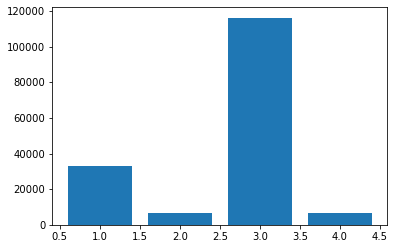

In [61]:
# do a quick histogram to see where most customers fall
df.serviceChannel = df.serviceChannel.astype('int')
count = Counter(df.serviceChannel)
print(count)
plt.bar(count.keys(), count.values())
plt.show()

Most customers fall into category 3, which is an offline 'order'. The second most frequent is category 1, which is an online 'order'. There is not much difference between offline and online subscriptions orders; these each make up about 4% of the total transactions.  

Another question is, should we group customers who have used a coupon on their first purchase? We already have a first_purchase column, and a couponUsed column. What percentage of first time customers used a coupon?

In [62]:
percentFirstCoupon = round(len(df[(df['couponUsed'] == 1) & (df['first_purchase'] == True)])/len(df[df['first_purchase']==True]) * 100, 2)

In [63]:
print("The percentage of first-time customers who used a coupon is",percentFirstCoupon)

The percentage of first-time customers who used a coupon is 10.63


In [64]:
percentNotFirstCoupon = round(len(df[(df['couponUsed'] == 1) & (df['first_purchase'] == False)])/len(df[df['first_purchase']==False]) * 100, 2)

In [65]:
print("The percentage of NOT first-time customers who used a coupon is",percentNotFirstCoupon)

The percentage of NOT first-time customers who used a coupon is 4.15


Certainly a greater share of first-time customers (10.63%) used a coupon than regulars who were not making a first time purchase (4.15%). Does the company accept coupons online, and on subscriptions? Let's used the new column to determine. 

In [66]:
# Group couponUsed=True by serviceChannel and list size of each group as a percentage of the total
sccu = df[df['couponUsed'] == True].groupby(['serviceChannel']).size() / len(df[df['couponUsed'] == True])

In [67]:
# Now group serviceChannels by percentage of the totalsS
scall = df.groupby(['serviceChannel']).size() / len(df)

In [68]:
# Price out sizes of service type cohorts.
cu = df.groupby(['serviceChannel', 'couponUsed']).size().unstack().fillna(0)
cu.rename(columns={0:'Coupon Not Used', 1:'Coupon Used'}, inplace=True)
print(cu)

couponUsed      Coupon Not Used  Coupon Used
serviceChannel                              
1                         29481         3614
2                          5965          414
3                        111485         4776
4                          6151          384


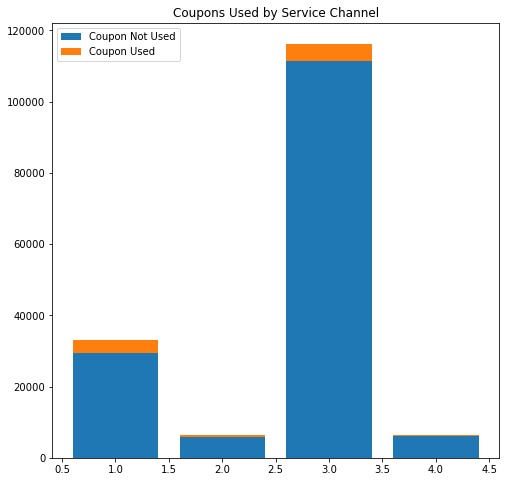

In [69]:
# Plot transactions by order type and service

fig, ax = plt.subplots(figsize=(8,8))

# Initialize the bottom at zero for the first set of bars.
bottom = np.zeros(len(cu))

# Plot each layer of the bar, adding each bar to the "bottom" so
# the next bar starts higher.
for i, col in enumerate(cu.columns):
  ax.bar(cu.index, cu[col], bottom=bottom, label=col)
  bottom += np.array(cu[col])

ax.set_title('Coupons Used by Service Channel')
ax.legend()


In [70]:
# Change categorical columns to datatype category as a group. 

categories = ['couponUsed', 'service_cat', 'dayIndex', 'isWeekday', 'serviceChannel']
for cat in categories:
    df[cat] = df[cat].astype('category')


In [71]:
df.order_date.min()

Timestamp('2019-02-13 00:00:00')

In [72]:
# Write the cleaned df to file. 
df.to_csv('data/cleanedkpi.csv', index=False)

In [73]:
# load the cleaned data from file and remove subscription records
df = pd.read_csv('data/cleanedkpi.csv')
df.head(2)

,partner_id,customer_id,ord_type_code,service,order_id,order_date,first_purchase,number_of_purchases,ord_channel_type_code,ord_payment_status_code,...,pymt_subscription,pymt_subscription_excess,refund_order,refund_subscription,refund_subscription_excess,couponUsed,service_cat,dayIndex,isWeekday,serviceChannel
0,74617,75068583,B2C,orders,73561191,2019-02-13,True,1,OFFLINE,PAID,...,0.0,0.0,0.0,0.0,0.0,0,0.0,2,1,3
1,74617,75217439,B2C,orders,73867112,2019-02-13,True,1,ONLINE,PAID,...,0.0,0.0,0.0,0.0,0.0,1,0.0,2,1,1


Recalling that the service channels are sorted as follows:
  1. Online and Order
  2. Online and Subscription
  3. Offline and Order
  4. Offline and Subscription

For our project we want to keep only categories 1 and 3.

In [74]:
# Keep only 'orders'
options = [1,3]
df_orders = df[df['serviceChannel'].isin(options)] 

In [75]:
df_orders.columns

Index(['partner_id', 'customer_id', 'ord_type_code', 'service', 'order_id',
       'order_date', 'first_purchase', 'number_of_purchases',
       'ord_channel_type_code', 'ord_payment_status_code', 'sales',
       'excess_subscription', 'pymt_order', 'pymt_subscription',
       'pymt_subscription_excess', 'refund_order', 'refund_subscription',
       'refund_subscription_excess', 'couponUsed', 'service_cat', 'dayIndex',
       'isWeekday', 'serviceChannel'],
      dtype='object')

In [76]:
# all of the services are orders. This column can be removed. 
df_orders['service'].unique()

array(['orders'], dtype=object)

In [77]:
# Can remove this column too
df_orders['refund_subscription'].unique()

array([0.])

In [78]:
# Can remove this column too
df_orders['excess_subscription'].unique()

array([0.])

In [79]:
# Can remove this column too
df_orders['service_cat'].unique()

array([0.])

In [80]:
# Can remove this column too
df_orders['pymt_subscription'].unique()

array([0.])

In [81]:
# Can remove this column too
df_orders['refund_subscription_excess'].unique()

array([0.])

In [82]:
# Can remove this column too
df_orders['pymt_subscription_excess'].unique()

array([0.])

In [83]:
df_orders = df_orders.drop(['refund_subscription_excess', 'pymt_subscription', 
                          'service_cat', 'excess_subscription', 'refund_subscription',
                            'pymt_subscription_excess', 'service'], axis=1)

In [84]:
# are all of the 'ord_type_code' B2C?
df_orders['ord_type_code'].unique()

array(['B2C', 'SUBSCRIPTION'], dtype=object)

In [85]:
len(df_orders)

149356

In [86]:
# There are a significant amount of orders that have 'ord_type_code' as SUBSCRIPTION even though they have
# service category of orders. 
sub = df_orders.loc[df_orders['ord_type_code'] == 'SUBSCRIPTION']
print("Num of records with ord_type_code = 'SUBSCRIPTION':", str(len(sub)))

Num of records with ord_type_code = 'SUBSCRIPTION': 40351


In [87]:
# Write the cleaned df to file. 
df_orders.to_csv('data/orderskpi.csv', index=False)

In [88]:
df_orders.order_date.max()

'2021-11-13'

In [380]:
df_orders.columns

Index(['partner_id', 'customer_id', 'ord_type_code', 'order_id', 'order_date',
       'first_purchase', 'number_of_purchases', 'ord_channel_type_code',
       'ord_payment_status_code', 'sales', 'pymt_order', 'refund_order',
       'couponUsed', 'dayIndex', 'isWeekday', 'serviceChannel'],
      dtype='object')

In [91]:
# Make sure order_id's are unique in this dataset
len(df_orders), len(df_orders['order_id'].unique())

(149356, 149356)